In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline
plt.rcParams['figure.figsize'] = 15,12

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df_train = pd.read_csv(r'D:\Analytics Vidya\train_BlackFriday.csv')

In [10]:
df_train.shape

(550068, 12)

In [11]:
df_train.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
448784,1003152,P00304742,M,18-25,4,A,3,0,8,NaN,NaN,5981
324849,1001980,P00319042,M,36-45,7,A,1,0,5,NaN,NaN,7148
3076,1000509,P00053842,M,26-35,2,A,0,1,4,5.0,12.0,3472
56844,1002784,P00323942,M,51-55,20,C,2,1,8,15.0,NaN,9839
13399,1002000,P00145042,M,18-25,4,C,1,0,1,2.0,5.0,8302


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [13]:
df_train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [14]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [18]:
df_train[df_train['User_ID'] == 1002010]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
13437,1002010,P00196042,M,18-25,4,B,0,0,4,9.0,15.0,1485
13438,1002010,P00070042,M,18-25,4,B,0,0,1,2.0,16.0,15364
13439,1002010,P00046142,M,18-25,4,B,0,0,1,16.0,NaN,15441
13440,1002010,P00127242,M,18-25,4,B,0,0,1,16.0,NaN,11866
13441,1002010,P00187842,M,18-25,4,B,0,0,1,16.0,NaN,15898
13442,1002010,P00080642,M,18-25,4,B,0,0,1,16.0,NaN,8157
13443,1002010,P00128742,M,18-25,4,B,0,0,1,NaN,NaN,7743
13444,1002010,P00009342,M,18-25,4,B,0,0,1,16.0,NaN,15702
13445,1002010,P00042942,M,18-25,4,B,0,0,1,15.0,NaN,11475
13446,1002010,P00136742,M,18-25,4,B,0,0,1,14.0,16.0,7715


#Let us divide the variables into their respective data types

# Independent Variable

### UniqueID:

1. User_ID : Unique ID for each person of data type Integer
2. Product_ID : Unique ID for each product of data type object

### Contnious Variables:(Ordinal Variable)

1. Stay_In_Current_City_Years

### Categorical Variables:

1. Gender 
2. Age
3. Occupation 
4. City_Category
5. Marital_Status
6. Product_Category_1 
7. Product_Category_2 
8. Product_Category_3

# Dependent Variable

### Continuous Varibale:
1. Purchase: Target variable 

In [32]:
#Converting the variable types
df_train["Occupation"]= df_train["Occupation"].astype(str)
df_train["Marital_Status"]= df_train["Marital_Status"].astype(str)
df_train["Product_Category_1"]= df_train["Product_Category_1"].astype(str)
df_train["Product_Category_2"]= df_train["Product_Category_2"].astype(str)
df_train["Product_Category_3"]= df_train["Product_Category_3"].astype(str)

# Exploratory Data Analysis

### Purchase(Target Vairble)

In [19]:
#descriptive statistics summary
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

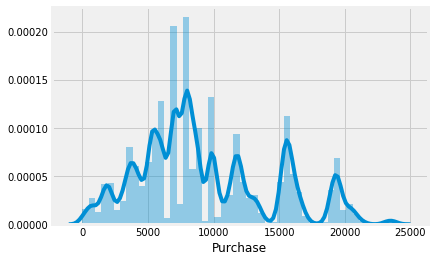

In [20]:
#histogram
sns.distplot(df_train['Purchase'])

1. We have to transform the data to better fit a normal disctribution
link: https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/

2. There is positive skewness in the data

In [21]:
#skewness and kurtosis
print("Skewness: %f" % df_train['Purchase'].skew())
print("Kurtosis: %f" % df_train['Purchase'].kurt())

Skewness: 0.600140
Kurtosis: -0.338378


The distribution is moderately skewed and the data is uniformly distributed and the outliers of our data are not much extreme

### Stay_In_Current_City_Years

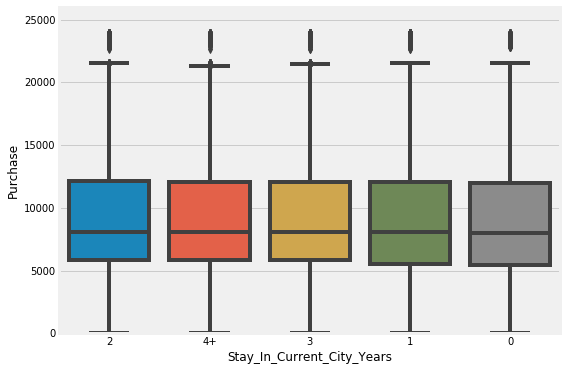

In [25]:
#box plot Stay_In_Current_City_Years
var = 'Stay_In_Current_City_Years'
data = pd.concat([df_train['Purchase'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Purchase", data=data)
fig.axis(ymin=0, ymax=26000);

From the box plot Stay_In_Current_City_Years, has no impact on the purchase, we might have to look for statistical tests to justify this

### Gender

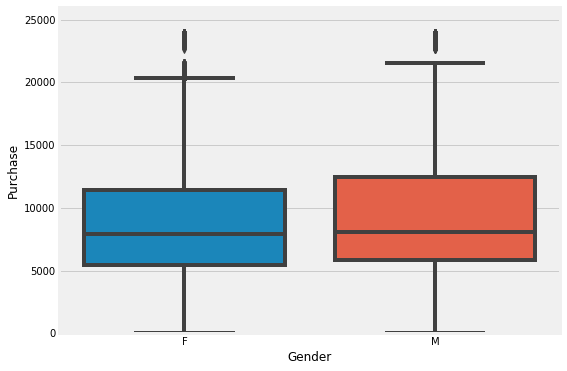

In [26]:
#box plot Gender
var = 'Gender'
data = pd.concat([df_train['Purchase'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Purchase", data=data)
fig.axis(ymin=0, ymax=26000);

From the box plot Gender, has an impact on the purchase, we might have to look for statistical tests to justify this.We might have to look for its effect on other variables

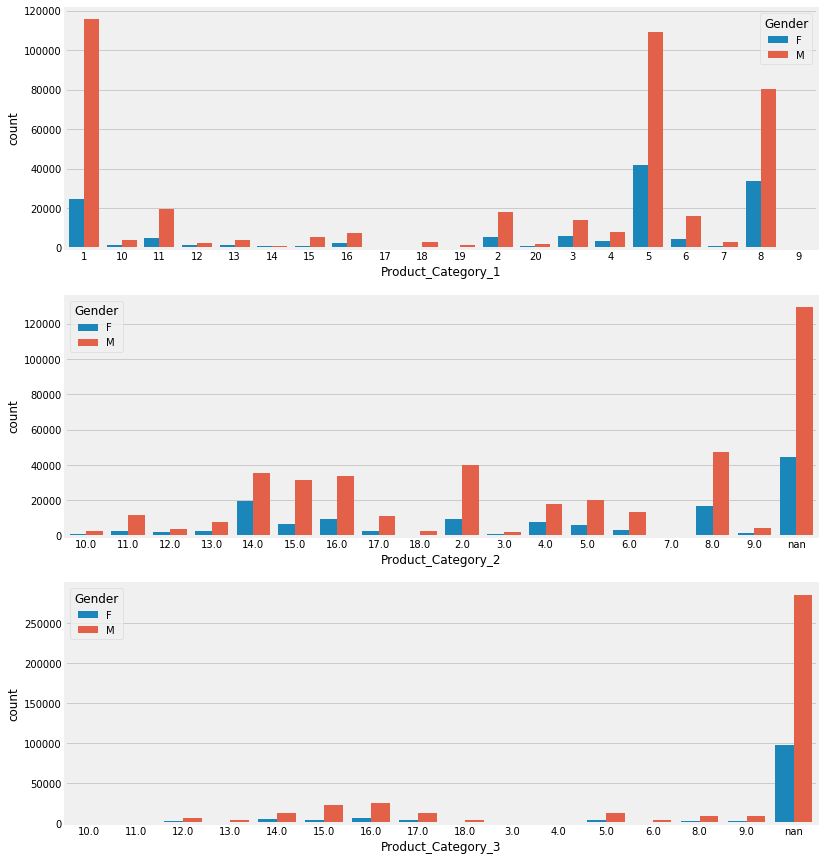

In [42]:
plt.rcParams['figure.figsize'] = (12, 15)

#CountPlot
# (3,1,1) indicates total number of rows, columns, and figure number respectively

plt.subplot(3, 1, 1)
sns.countplot(x="Product_Category_1", hue="Gender", data=df_train)

plt.subplot(3, 1, 2)
sns.countplot(x="Product_Category_2", hue="Gender", data=df_train)

plt.subplot(3, 1, 3)
sns.countplot(x="Product_Category_3", hue="Gender", data=df_train)

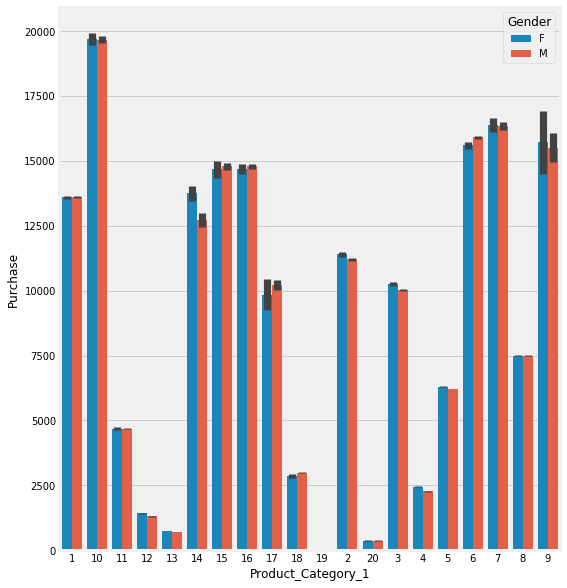

In [49]:
plt.rcParams['figure.figsize'] = (8, 10)

#BarPlot

sns.barplot(x="Product_Category_1", y = 'Purchase',hue="Gender", data=df_train)

### Age

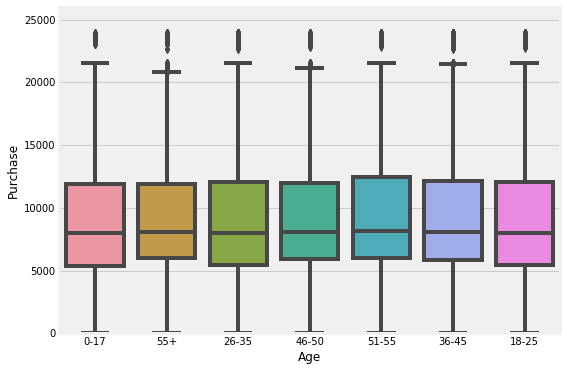

In [41]:
#box plot Gender
var = 'Age'
data = pd.concat([df_train['Purchase'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Purchase", data=data)
fig.axis(ymin=0, ymax=26000);

From the box plot Gender, has an impact on the purchase, we might have to look for statistical tests to justify this.We might have to look for its effect on other variables

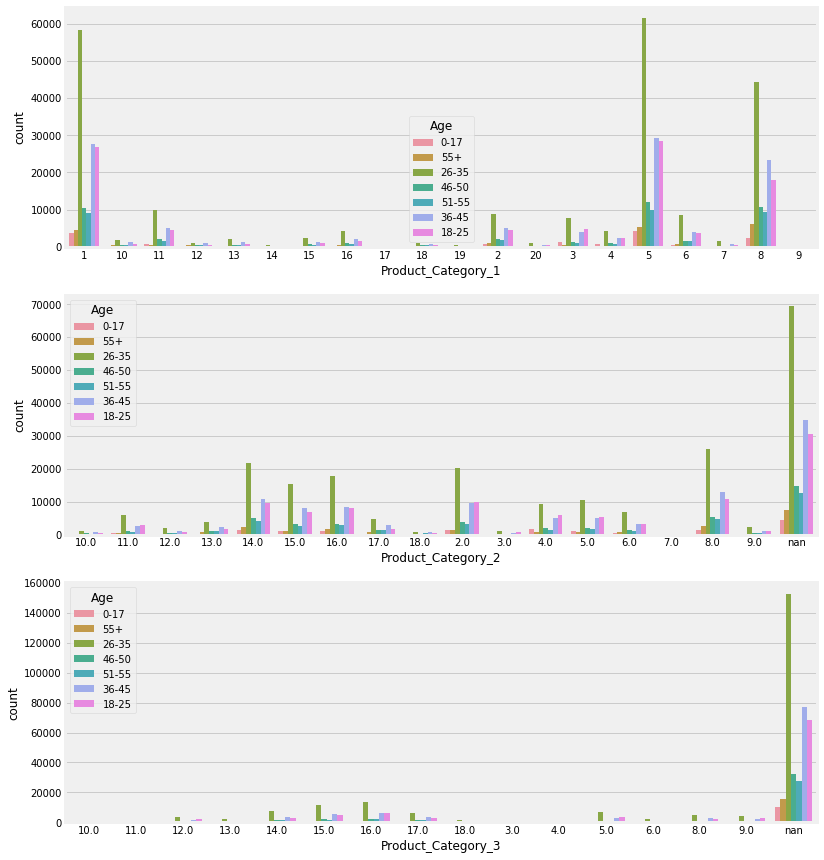

In [43]:
plt.rcParams['figure.figsize'] = (12, 15)

#CountPlot
# (3,1,1) indicates total number of rows, columns, and figure number respectively

plt.subplot(3, 1, 1)
sns.countplot(x="Product_Category_1", hue="Age", data=df_train)

plt.subplot(3, 1, 2)
sns.countplot(x="Product_Category_2", hue="Age", data=df_train)

plt.subplot(3, 1, 3)
sns.countplot(x="Product_Category_3", hue="Age", data=df_train)

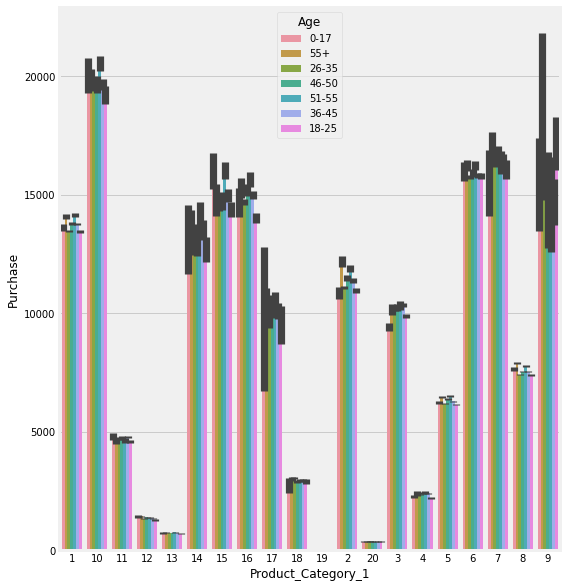

In [48]:
plt.rcParams['figure.figsize'] = (8, 10)

#BarPlot

sns.barplot(x="Product_Category_1", y = 'Purchase',hue="Age", data=df_train)

### City_Category

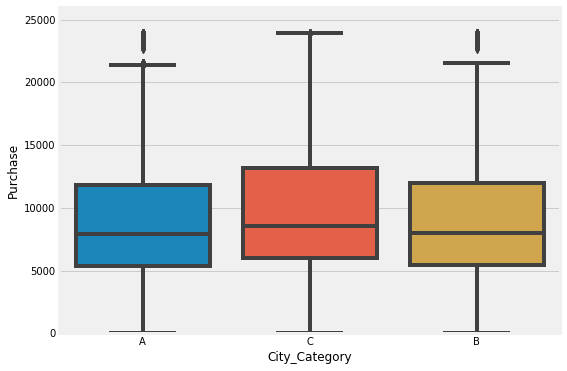

In [50]:
#box plot Gender
var = 'City_Category'
data = pd.concat([df_train['Purchase'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Purchase", data=data)
fig.axis(ymin=0, ymax=26000);

From the box plot Gender, has an impact on the purchase, we might have to look for statistical tests to justify this.We might have to look for its effect on other variables

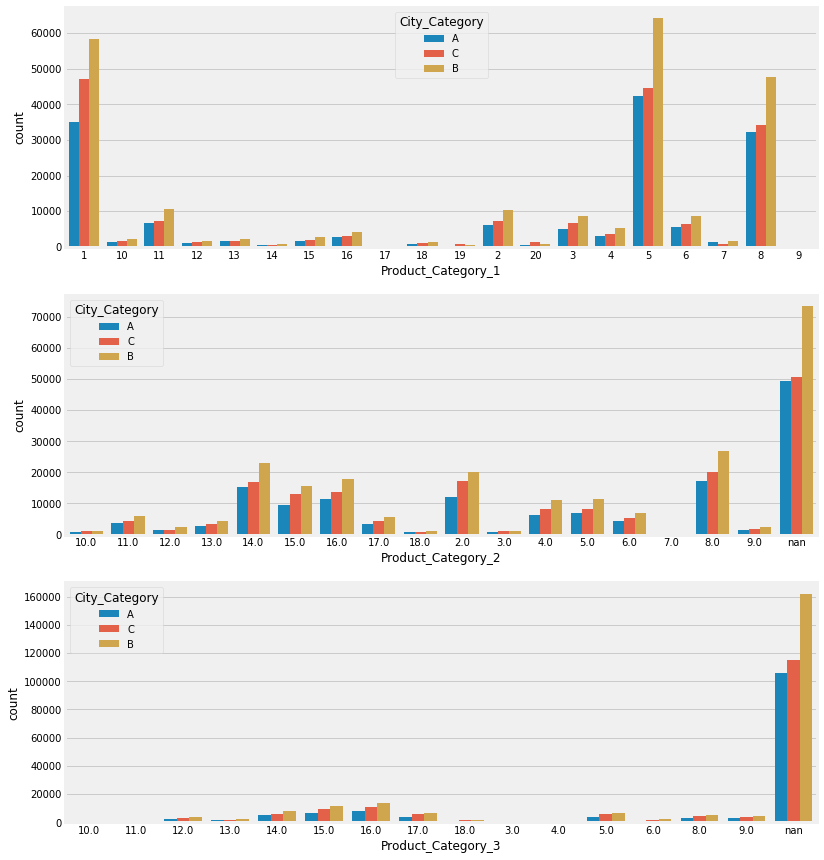

In [51]:
plt.rcParams['figure.figsize'] = (12, 15)

#CountPlot
# (3,1,1) indicates total number of rows, columns, and figure number respectively

plt.subplot(3, 1, 1)
sns.countplot(x="Product_Category_1", hue="City_Category", data=df_train)

plt.subplot(3, 1, 2)
sns.countplot(x="Product_Category_2", hue="City_Category", data=df_train)

plt.subplot(3, 1, 3)
sns.countplot(x="Product_Category_3", hue="City_Category", data=df_train)

### Marital_Status

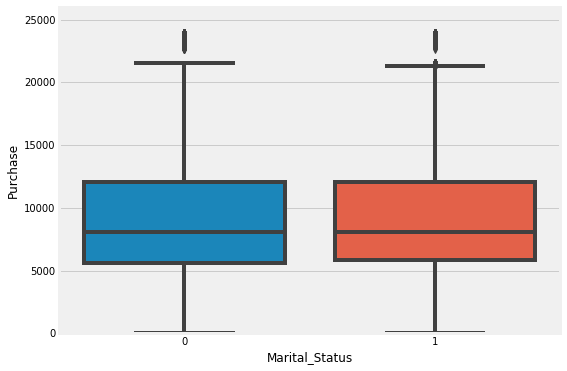

In [52]:
#box plot Gender
var = 'Marital_Status'
data = pd.concat([df_train['Purchase'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Purchase", data=data)
fig.axis(ymin=0, ymax=26000);

From the box plot Gender, has an impact on the purchase, we might have to look for statistical tests to justify this.We might have to look for its effect on other variables

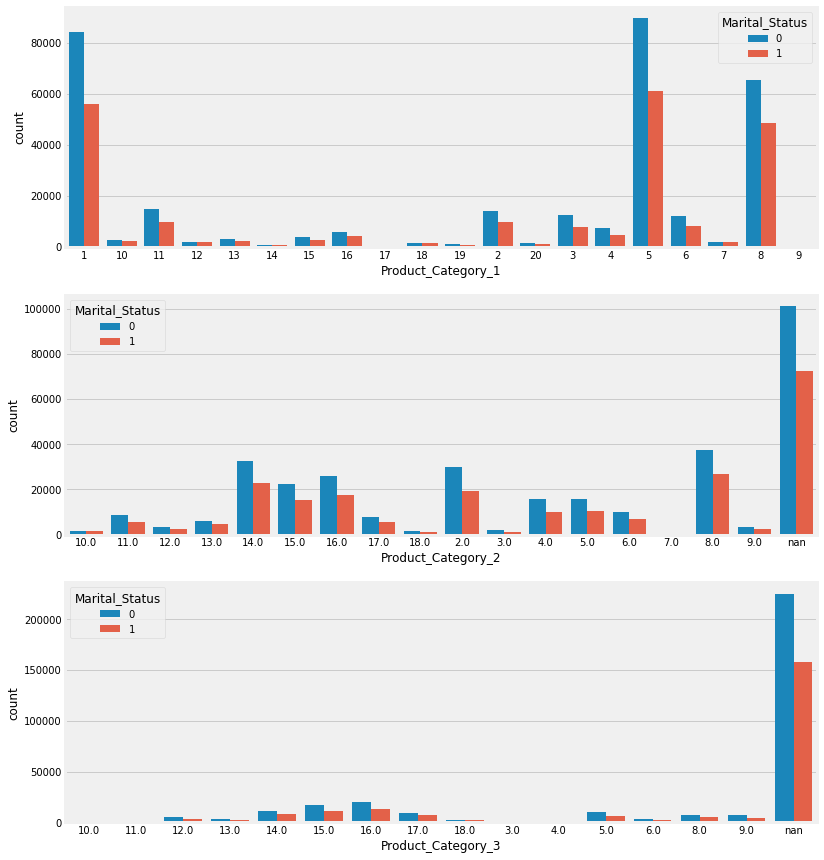

In [53]:
plt.rcParams['figure.figsize'] = (12, 15)

#CountPlot
# (3,1,1) indicates total number of rows, columns, and figure number respectively

plt.subplot(3, 1, 1)
sns.countplot(x="Product_Category_1", hue="Marital_Status", data=df_train)

plt.subplot(3, 1, 2)
sns.countplot(x="Product_Category_2", hue="Marital_Status", data=df_train)

plt.subplot(3, 1, 3)
sns.countplot(x="Product_Category_3", hue="Marital_Status", data=df_train)